In [165]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
path_train = 'D:\Codenation\\train.csv'
path_test = 'D:\Codenation\\test.csv'

df_enem_train = pd.read_csv(path_train)
df_enem_test = pd.read_csv(path_test)

df_enem_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [167]:
df_enem_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,-0.004914,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,0.003906,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,0.001002,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,-0.010967,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


In [168]:
features = [
            'NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            'NU_NOTA_REDACAO',
            'NU_NOTA_COMP1',
            'NU_NOTA_COMP2',
            'NU_NOTA_COMP3',
            'NU_NOTA_COMP4',
            'NU_NOTA_COMP5',
            'TP_ANO_CONCLUIU',
            'TP_ESCOLA',
            'IN_TREINEIRO']

features_corr = [
                'NU_NOTA_MT',
                'NU_NOTA_CN',
                'NU_NOTA_CH',
                'NU_NOTA_LC',
                'NU_NOTA_REDACAO',
                'NU_NOTA_COMP1',
                'NU_NOTA_COMP2',
                'NU_NOTA_COMP3',
                'NU_NOTA_COMP4',
                'NU_NOTA_COMP5',
                'TP_ANO_CONCLUIU',
                'TP_ESCOLA',
                'IN_TREINEIRO']

In [169]:
df_enem_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
TP_ANO_CONCLUIU       0
TP_ESCOLA             0
IN_TREINEIRO          0
dtype: int64

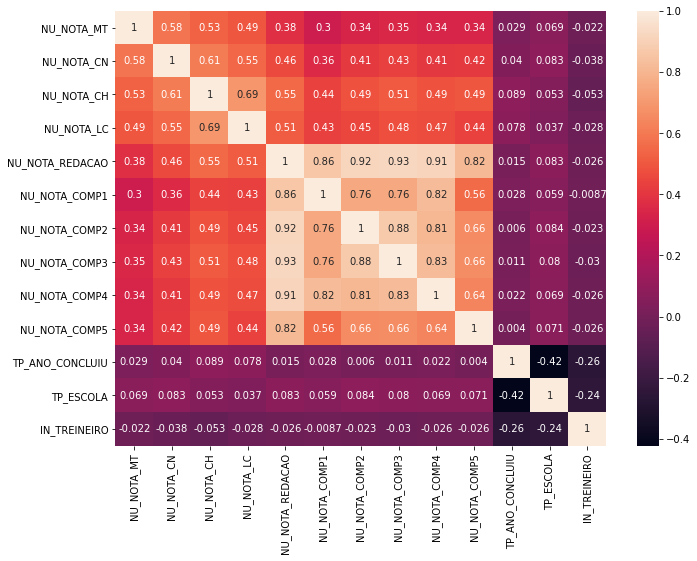

In [170]:
corr = df_enem_train[features_corr].corr()
ax = plt.subplots(figsize=(11,8))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

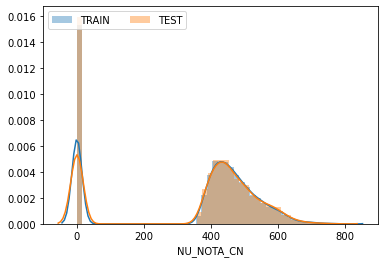

In [171]:
x0 = df_enem_train['NU_NOTA_CN'].fillna(0)
x1 = df_enem_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left')

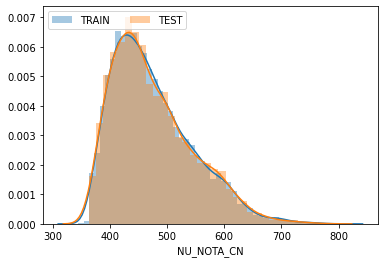

In [172]:
df_enem_train = df_enem_train.loc[
                (df_enem_train['NU_NOTA_CN'].notnull()) & (df_enem_train['NU_NOTA_CN'] != 0) &
                (df_enem_train['NU_NOTA_CH'].notnull()) & (df_enem_train['NU_NOTA_CH'] != 0) &
                (df_enem_train['NU_NOTA_LC'].notnull()) & (df_enem_train['NU_NOTA_LC'] != 0) &
                (df_enem_train['NU_NOTA_REDACAO'].notnull()) & (df_enem_train['NU_NOTA_REDACAO'] != 0)]

df_enem_test = df_enem_test.loc[
                (df_enem_test['NU_NOTA_CN'].notnull()) & (df_enem_test['NU_NOTA_CN'] != 0) &
                (df_enem_test['NU_NOTA_CH'].notnull()) & (df_enem_test['NU_NOTA_CH'] != 0) &
                (df_enem_test['NU_NOTA_LC'].notnull()) & (df_enem_test['NU_NOTA_LC'] != 0) &
                (df_enem_test['NU_NOTA_REDACAO'].notnull()) & (df_enem_test['NU_NOTA_REDACAO'] != 0)]

x0 = df_enem_train['NU_NOTA_CN'].fillna(0)
x1 = df_enem_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left')

In [173]:
df_enem_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
TP_ANO_CONCLUIU    0
TP_ESCOLA          0
IN_TREINEIRO       0
dtype: int64

In [174]:
df_enem_test['NU_NOTA_COMP1'].fillna(0, inplace=True)
df_enem_test['NU_NOTA_COMP2'].fillna(0, inplace=True)
df_enem_test['NU_NOTA_COMP3'].fillna(0, inplace=True)
df_enem_test['NU_NOTA_COMP4'].fillna(0, inplace=True)
df_enem_test['NU_NOTA_COMP5'].fillna(0, inplace=True)

df_enem_train['NU_NOTA_COMP1'].fillna(0, inplace=True)
df_enem_train['NU_NOTA_COMP2'].fillna(0, inplace=True)
df_enem_train['NU_NOTA_COMP3'].fillna(0, inplace=True)
df_enem_train['NU_NOTA_COMP4'].fillna(0, inplace=True)
df_enem_train['NU_NOTA_COMP5'].fillna(0, inplace=True)


In [175]:
y_train = df_enem_train['NU_NOTA_MT']
X_train = df_enem_train[features]
X_test = df_enem_test[features]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
            criterion='mae',
            max_depth=8,
            max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1,
            min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            n_estimators=500,
            n_jobs=-1,
            random_state=0,
            verbose=0,
            warm_start=False)

regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [177]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

print('MAE: ', metrics.mean_absolute_error(y_train,y_pred_train).round(8))
print('MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(8))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train).round(8)))

MAE:  53.00443948
MSE:  4622.01499304
RMSE:  67.98540279383509


In [178]:
regressor.score(X_train, y_train)

0.5305024393472996

In [184]:
df_enem_test['NU_NOTA_MT'] = y_pred_test
df_enem_test.columns
df_resultado = df_enem_test[['NU_INSCRICAO','NU_NOTA_MT']]

In [188]:
df_resultado.set_index('NU_INSCRICAO', inplace=True)
df_resultado.head()

,NU_NOTA_MT
NU_INSCRICAO,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,421.2554
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,440.8895
b38a03232f43b11c9d0788abaf060f7366053b6d,597.0073
715494628a50142ce8cb17191cfe6d0f3cae0934,512.9082
e656d6bad65c93fb2880f1eba5037008c8e75774,467.1986


In [189]:
df_resultado.to_csv('D:\\aswer.csv')